In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

In [2]:
data_dir = "/mnt/data/datasets/kitti/dataset/sequences/00/image_0/"

#TODO find actual camera matrix
cam_matrix = np.zeros((3,3), dtype=float)
cam_matrix[0,0] = 718.856 #fx
cam_matrix[0,2] = 607.1928 #cx
cam_matrix[1,2] = 185.2157 #cy
cam_matrix[1,1] = 718.856 #fy
cam_matrix[2,2] = 1

In [3]:
def init_flann():
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 6)
    search_params = dict(checks = 150)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    return flann

In [11]:
def flann_ratio_match(flann, des1, des2):
    matches = flann.knnMatch(des1, des2, k=2)
    #perform lowe's ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    
    return good

In [5]:
def retrieve_trans(good_m, kp1, kp2):
    #translate matches to pixel cordinates... i thinl
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_m ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_m ]).reshape(-1,1,2)
    #find transformation and remve points that dont fit.
    E, mask = cv2.findEssentialMat(src_pts, dst_pts, cam_matrix, cv2.RANSAC, 0.999, 0.5)
    src_pts = src_pts[mask.ravel() == 1]
    dst_pts = dst_pts[mask.ravel() == 1]

    R1, R2, T = cv2.decomposeEssentialMat(E, src_pts, dst_pts)
    #print(T)
    #print(R2)
    return T*20, R2

In [6]:
def retrieve_trans_From_pts(pts1, pts2):
    E, mask = cv2.findEssentialMat(pts1, pts2, cam_matrix, cv2.RANSAC, 0.999,0.5)
    pts1 = pts1[mask.ravel() == 1]
    pts2 = pts1[mask.ravel() == 1]
    R1, R2, T = cv2.decomposeEssentialMat(E, pts1, pts1)
    return T, R2

In [7]:
def append_trans(pose1, pose2):
    
    pose1[0] = pose1[0] + pose1[1].dot(pose2[0])
    pose1[1] = pose2[1].dot(pose2[1])
    return pose1

In [8]:
sift = cv2.xfeatures2d.SIFT_create()
flann = init_flann()
#         T                             R
pose = [np.zeros((3,1),dtype=float), np.zeros((3,3),dtype=float)]

<IPython.core.display.Javascript object>


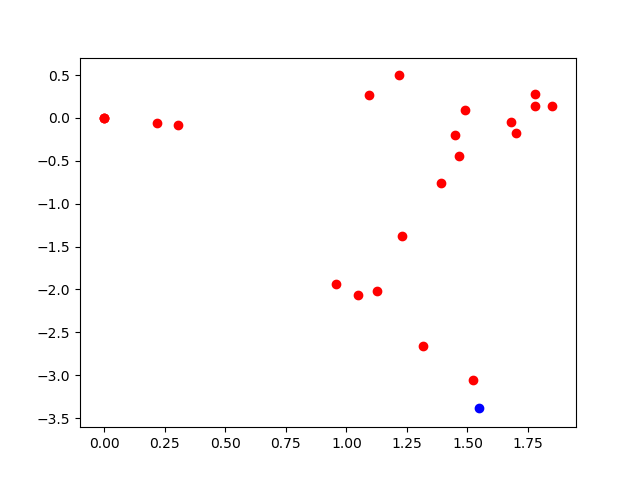

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.DMatch'>
<class 'cv2.D

In [9]:
xs = [0]*2
ys = [0]*2
zs = [0]*2
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

old_frame = cv2.imread(os.path.join(data_dir, str(0).zfill(6) + '.png'))
kp1, des1 = sift.detectAndCompute(old_frame, None)
try:
    for image_id in range(1,4541,2):
        #find keypoints in new frame
        frame = cv2.imread(os.path.join(data_dir, str(image_id).zfill(6) + '.png'))
        cv2.imshow("frame", frame)
        if (cv2.waitKey(1) & 0xFF) == ord('q'):
            break
        
        kp2, des2 = sift.detectAndCompute(frame, None)
        
        #print(image_id)
        #TODO remove all kp that dont fit the transformation
        good_m = flann_ratio_match(flann, des1, des2)
    
    #for drawing lines in picture
    #matches_l_l = [[m] for m in good_m]
    #matched_frame = cv2.drawMatchesKnn(old_frame, kp1, frame, kp2, matches_l_l[:20], None, flags=2)
    #cv2.imshow("frame", matched_frame)
    #if (cv2.waitKey(1) & 0xFF) == ord('q'):
     #   break
    
    
    #print(len(good_m))
        n_pose = retrieve_trans(good_m, kp1, kp2)
        pose = append_trans(pose, n_pose)

        #check for new keyframe
        if len(good_m) < 550:
            kp1 = kp2.copy()
            des1 = des2.copy()
            old_frame = frame.copy()
    
        #for graph
        xs.append(pose[0][0][0])
        ys.append(pose[0][1][0])
        zs.append(pose[0][2][0])
        ax.clear()
        #print(xs)
        ax.scatter(xs[:-1],ys[:-1],color='red')
        ax.scatter(xs[-1],ys[-1], color='blue')
        fig.canvas.draw()
    
except KeyboardInterrupt:
    cv2.destroyAllWindows()

In [10]:
cv2.destroyAllWindows()


In [ ]:
show_im = True
